In [49]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:20,.2f}'.format #para arreglar la notacion cientifica

In [28]:
#Usar el area del monitor widescreen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

![title](data/kickstarter-logo.png)

# Kickstarter Projects

---
###### Sobre el Proyecto:

Ingestar, explorar, preparar, evaluar y visualizar detalles sobre el exito y fracaso de los proyectos propuestos en **Kickstarter** basado en el set de datos que se encuentra en: https://www.kaggle.com/kemical/kickstarter-projects

###### Que es Kickstarter?

> Kickstarter es una plataforma que provee a artistas, músicos, cineastas, diseñadores y otros creadores con los recursos y el apoyo necesarios para llevar sus ideas a la realidad. 

###### Hipotesis sobre factores que pueden influenciar en el exito o fracaso de un proyecto:
1. La cantidad de dinero solicitado
2. El tiempo disponible antes del fin de la publicacion
3. Momento durante el año en que se publicó el proyecto
4. Categoria del proyecto

###### Informacion general de los Proyectos suminstrada por Kickstarter.com:
    Indice de exito actual:                            36,92%
    Contribuciones a proyectos financiados con exito: $3,78 B
    Proyectos activos:                                 3.857

## 1. Ingesta y exploracion:
---
En esta parte nos dedicaremos a ingestar los datos y luego obtner detalles de los mismos que nos permitan entender los datos y como estan relacionados entre si, ademas de buscar puntos de mejora y posibles ajustes a realizar antes de la evaluacion.

In [54]:
#Carga de archivos en diferentes dataframes
data = pd.read_csv('data/ks-projects-201801.csv', low_memory=False)

##### Prevista de primeras lineas:

In [55]:
data.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,"1,000.00",2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,"1,533.95"
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,"30,000.00",2017-09-02 04:43:57,"2,421.00",failed,15,US,100.00,"2,421.00","30,000.00"
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,"45,000.00",2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,"45,000.00"
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,"5,000.00",2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,"5,000.00"
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,"19,500.00",2015-07-04 08:35:03,"1,283.00",canceled,14,US,"1,283.00","1,283.00","19,500.00"


In [58]:
#Detalles del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


Notas:
1. *La cantidad de dinero aportado (usd pledged) no se encuentra 100% poblada (3.797 valores nulos)*
2. *El set de datos contiene las columnas usd_pledged_real y usd_goal_real que fueron obtenidas por una herramienta externa que realizo una conversion de moneda basado en la fecha final del proyecto y que se encuentran 100% pobladas*

In [57]:
#Detalle de los valores numericos
data.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,"378,661.00","378,661.00","378,661.00","378,661.00","374,864.00","378,661.00","378,661.00"
mean,"1,074,731,191.99","49,080.79","9,682.98",105.62,"7,036.73","9,058.92","45,454.40"
std,"619,086,204.32","1,183,391.26","95,636.01",907.19,"78,639.75","90,973.34","1,152,950.06"
min,"5,971.00",0.01,0.00,0.00,0.00,0.00,0.01
25%,"538,263,516.00","2,000.00",30.00,2.00,16.98,31.00,"2,000.00"
50%,"1,075,275,634.00","5,200.00",620.00,12.00,394.72,624.33,"5,500.00"
75%,"1,610,148,624.00","16,000.00","4,076.00",56.00,"3,034.09","4,050.00","15,500.00"
max,"2,147,476,221.00","100,000,000.00","20,338,986.27","219,382.00","20,338,986.27","20,338,986.27","166,361,390.71"


Notas:
1. *La cantidad de USD promedio para lograr alcanzar el objetivo de un proyecto es de \$45,454*
2. *La candidad promedio de dinero aportardo en un proyecto es de \$9,058*
3. *La cantidad promedio de persona que brindan soporte a un proyecto es de 105*
4. *La maxima cantidad de dinero solicitado para un proyecto es de mas de \$166 millones*
5. *La maxima cantidad de dinero recaudado para un proyecto es de mas de \$20 millones*

In [62]:
#Valores unicos por columna
data.apply(pd.Series.nunique)

ID                  378661
name                375764
category               159
main_category           15
currency                14
deadline              3164
goal                  8353
launched            378089
pledged              62130
state                    6
backers               3963
country                 23
usd pledged          95455
usd_pledged_real    106065
usd_goal_real        50339
dtype: int64

Notas:
1. *Hay un posible correlacion entre category y main_category*
2. *Hay 14 posibles tipos de moneda*
3. *Un proyecto puede tener 6 estados diferentes*
4. *Hay proyectos de 23 paises diferentes*

#### Categorias

In [131]:
#Validacion de relacion entre category y main_category
data.groupby(['main_category', 'category']).size()

main_category  category         
Art            Art                  8253
               Ceramics              305
               Conceptual Art       1030
               Digital Art          1346
               Illustration         3175
               Installations         482
               Mixed Media          2757
               Painting             3294
               Performance Art      2154
               Public Art           3077
               Sculpture            1810
               Textiles              276
               Video Art             194
Comics         Anthologies           405
               Comic Books          2743
               Comics               4996
               Events                163
               Graphic Novels       1864
               Webcomics             648
Crafts         Candles               429
               Crafts               4664
               Crochet               162
               DIY                  1173
               Embroider

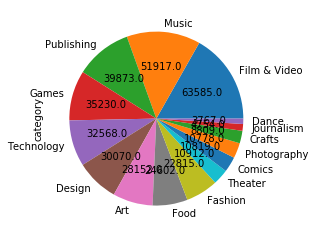

In [130]:
data.dropna(subset=["main_category"])
datos = data.groupby("main_category")["category"].count().sort_values(ascending=False)[:15]

def obtenerLabel(percentage):
    label = datos.sum()*percentage//100
    return str(label)

datos.plot(kind="pie", autopct=obtenerLabel)

#### Moneda

In [105]:
#dist
data.groupby(['currency']).size()

currency
AUD      7950
CAD     14962
CHF       768
DKK      1129
EUR     17405
GBP     34132
HKD       618
JPY        40
MXN      1752
NOK       722
NZD      1475
SEK      1788
SGD       555
USD    295365
dtype: int64

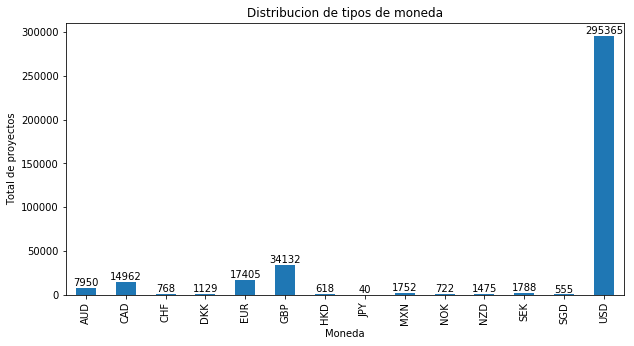

In [129]:
valores = data.groupby('currency')['currency'].count()

# Plot the figure.
plt.figure(figsize=(10, 5))
ax = valores.plot(kind='bar')
ax.set_title('Distribucion de tipos de moneda')
ax.set_xlabel('Moneda')
ax.set_ylabel('Total de proyectos')

barras = ax.patches

for barra, label in zip(barras, valores.values):
    height = barra.get_height()
    ax.text(barra.get_x() + barra.get_width() / 2, height, str(label)[:7],
            ha='center', va='bottom')


Nota:
 1. *La columna usd_pledged_real convierte el valor monetario de las monedas que no son norteamericanas a USD*

#### Estados de Proyectos

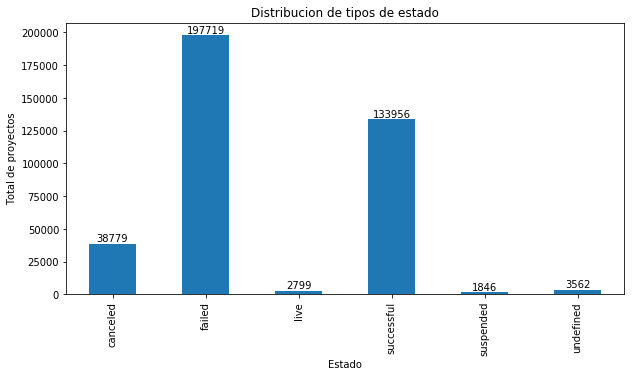

In [137]:
valores = data.groupby('state')['state'].count()

# Plot the figure.
plt.figure(figsize=(10, 5))
ax = valores.plot(kind='bar')
ax.set_title('Distribucion de tipos de estado')
ax.set_xlabel('Estado')
ax.set_ylabel('Total de proyectos')

barras = ax.patches

for barra, label in zip(barras, valores.values):
    height = barra.get_height()
    ax.text(barra.get_x() + barra.get_width() / 2, height, str(label)[:7],
            ha='center', va='bottom')


Nota:
1. *Para propositos de la evaluacion solo serian de interes los estados failed y sucessful*

#### Paises

In [138]:
data.groupby(['country']).size()

country
AT         597
AU        7839
BE         617
CA       14756
CH         761
DE        4171
DK        1113
ES        2276
FR        2939
GB       33672
HK         618
IE         811
IT        2878
JP          40
LU          62
MX        1752
N,0"      3797
NL        2868
NO         708
NZ        1447
SE        1757
SG         555
US      292627
dtype: int64

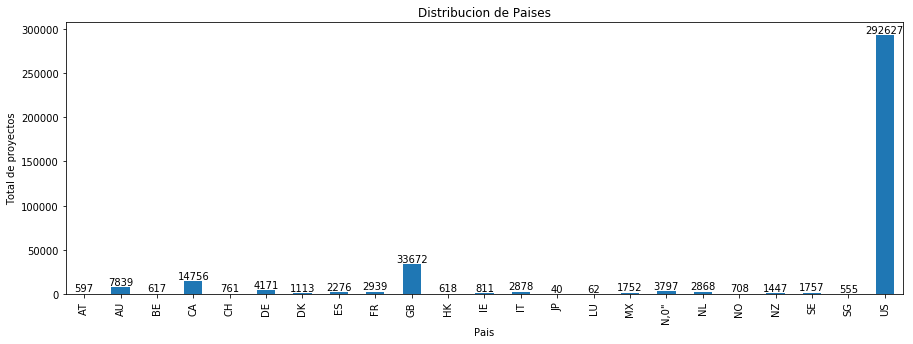

In [140]:
valores = data.groupby('country')['country'].count()

# Plot the figure.
plt.figure(figsize=(15, 5))
ax = valores.plot(kind='bar')
ax.set_title('Distribucion de Paises')
ax.set_xlabel('Pais')
ax.set_ylabel('Total de proyectos')

barras = ax.patches

for barra, label in zip(barras, valores.values):
    height = barra.get_height()
    ax.text(barra.get_x() + barra.get_width() / 2, height, str(label)[:7],
            ha='center', va='bottom')

Notas:
1. *Hay 3,797 registros con un codigo de pais invalido: N,0"

###### Concluciones de la exploracion:

1. Las estadisticas generales muestran que el aporte promedio a los proyectos es mucho menor al promedio de dinero general de los proyectos
2. Hay 5 categorias populares que abarcan la mayoria de los proyectos
3. No hay necesidad de usar las monedas especificas de los proyectos ya que las mismas fueron transformadas a USD
4. Hay 4 estados de un proyecto que no son de utilidad para el proposito del analisis
5. Hay datos invalidos en el codigo de pais que podrian ser eliminados para no entorpecer el proceso

## 2. Preparacion y evaluacion de los datos:
---
Luego de explorar los datos procedemos a definir y aplicar reglas de datos para remover, consolidar y en general preparar los datos para su evaluación

In [171]:
#Creando data set con solo proyectos fallidos y completados
data_prep = data[data["state"].isin(["failed", "successful"])]

data_prep.groupby(['state']).size()

state
failed        197719
successful    133956
dtype: int64

In [187]:
#Creando datafram con la agrupacion del los estados para luego obetner su porcentage
data_group = data_prep.groupby(['state']).size()

data_group = pd.DataFrame([data_group])
data_group = data_group.T # transform
data_group.columns = ['total']

#data_group['total'] = p.apply(axis=2)

In [188]:
data_group.head()

,total
state,
failed,197719
successful,133956


In [189]:
#generacion de porcentage
def compute_percentage(x):
    pct = float(x/data_group['total'].sum()) * 100
    return round(pct, 2)

data_group['percentage'] = data_group.apply(compute_percentage, axis=1)

data_group['estado'] = data_group.index

In [190]:
data_group.head()

,total,percentage,estado
state,,,
failed,197719,59.61,failed
successful,133956,40.39,successful


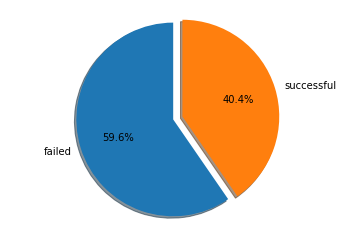

In [194]:
# Visualizacion de proyectos fallidos vs completos
labels = data_group['estado']
sizes = data_group['percentage']
explode = (0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Notas: *al omitir los otros estados podemos ver que la relación entre proyectos cumplidos vs fallidos es de 60% - 40%*

In [200]:
#remover columnas que no van a ser utilizadas en del dataframe
data_prep = data_prep.drop(["currency"], axis = 1)
data_prep = data_prep.drop(["goal"], axis = 1)
data_prep = data_prep.drop(["pledged"], axis = 1)
data_prep = data_prep.drop(["usd pledged"], axis = 1)


In [201]:
data_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331675 entries, 0 to 378660
Data columns (total 11 columns):
ID                  331675 non-null int64
name                331672 non-null object
category            331675 non-null object
main_category       331675 non-null object
deadline            331675 non-null object
launched            331675 non-null object
state               331675 non-null object
backers             331675 non-null int64
country             331675 non-null object
usd_pledged_real    331675 non-null float64
usd_goal_real       331675 non-null float64
dtypes: float64(2), int64(2), object(7)
memory usage: 40.4+ MB


In [204]:
#buscando duplicados
data_prep = data_prep.dropna()

data_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331672 entries, 0 to 378660
Data columns (total 11 columns):
ID                  331672 non-null int64
name                331672 non-null object
category            331672 non-null object
main_category       331672 non-null object
deadline            331672 non-null object
launched            331672 non-null object
state               331672 non-null object
backers             331672 non-null int64
country             331672 non-null object
usd_pledged_real    331672 non-null float64
usd_goal_real       331672 non-null float64
dtypes: float64(2), int64(2), object(7)
memory usage: 30.4+ MB


*3 registros eliminados*

In [211]:
#preparar las fechas y generar duraciones

#cambiar columnas a datetime
data_prep['launched'] = pd.to_datetime(data_prep['launched'])
data_prep['deadline'] = pd.to_datetime(data_prep['deadline'])

data_prep["year_start"] = data_prep["launched"].dt.year  #extraer año
data_prep["month_start"] = data_prep["launched"].dt.month #extraer mes
data_prep["project_time"] = data_prep["deadline"] - data_prep["launched"] #diff en tiempo
data_prep["project_time"] = data_prep["project_time"].apply(lambda x: int(str(x).split()[0]))
data_prep["state_bool"] = data_prep["state"].apply(lambda x: 1 if x=="successful" else 0) #booleando de estado

In [213]:
data_prep.head()

,ID,name,category,main_category,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real,year_start,month_start,project_time,state_bool
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,2015-10-09,2015-08-11 12:12:28,failed,0,GB,0.00,"1,533.95",2015,8,58,0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,2017-11-01,2017-09-02 04:43:57,failed,15,US,"2,421.00","30,000.00",2017,9,59,0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,2013-02-26,2013-01-12 00:20:50,failed,3,US,220.00,"45,000.00",2013,1,44,0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,2012-04-16,2012-03-17 03:24:11,failed,1,US,1.00,"5,000.00",2012,3,29,0
5,1000014025,Monarch Espresso Bar,Restaurants,Food,2016-04-01,2016-02-26 13:38:27,successful,224,US,"52,375.00","50,000.00",2016,2,34,1


In [218]:
#detalles de datos filtrados y con nuevos valores generados
data_prep.describe()

,ID,backers,usd_pledged_real,usd_goal_real,year_start,month_start,project_time,state_bool
count,"331,672.00","331,672.00","331,672.00","331,672.00","331,672.00","331,672.00","331,672.00","331,672.00"
mean,"1,074,270,473.55",116.38,"9,943.55","41,509.66","2,014.18",6.42,32.95,0.40
std,"619,193,075.11",965.43,"96,733.37","1,108,934.64",1.93,3.31,12.71,0.49
min,"5,971.00",0.00,0.00,0.01,"2,009.00",1.00,0.00,0.00
25%,"537,171,096.50",2.00,50.00,"2,000.00","2,013.00",4.00,29.00,0.00
50%,"1,074,574,892.50",15.00,788.00,"5,000.00","2,014.00",6.00,29.00,0.00
75%,"1,609,843,457.75",63.00,"4,608.00","15,000.00","2,016.00",9.00,35.00,1.00
max,"2,147,476,221.00","219,382.00","20,338,986.27","166,361,390.71","2,017.00",12.00,91.00,1.00


In [215]:
#detalles de proyectos finalizados con exito
data_prep[data_prep.state_bool == 1].describe()

,ID,backers,usd_pledged_real,usd_goal_real,year_start,month_start,project_time,state_bool
count,"133,956.00","133,956.00","133,956.00","133,956.00","133,956.00","133,956.00","133,956.00","133,956.00"
mean,"1,073,727,308.41",263.92,"22,670.80","9,532.85","2,014.01",6.37,31.16,1.00
std,"619,151,364.61","1,504.58","151,090.32","27,961.44",2.03,3.31,11.77,0.00
min,"21,109.00",0.00,0.79,0.01,"2,009.00",1.00,0.00,1.00
25%,"535,444,349.00",33.00,"2,000.00","1,301.91","2,012.00",4.00,29.00,1.00
50%,"1,076,595,218.50",71.00,"5,107.25","3,837.74","2,014.00",6.00,29.00,1.00
75%,"1,608,161,317.00",167.00,"13,232.08","10,000.00","2,016.00",9.00,33.00,1.00
max,"2,147,476,221.00","219,382.00","20,338,986.27","2,015,608.88","2,017.00",12.00,91.00,1.00


###### Notas de proyectos finalizados con exito:
1. *en promedio tienden a recaudar el doble de lo solicitado*
2. *el goal de recoleccion anda cercano al promedio de dinero aportado en general para un proyecto (9,532.85 vs 9,943.55)*
3. *la duracion promedio de un proyecto es de un mes*

In [217]:
#detalles de proyectos fallidos
data_prep[data_prep.state_bool == 0].describe()

,ID,backers,usd_pledged_real,usd_goal_real,year_start,month_start,project_time,state_bool
count,"197,716.00","197,716.00","197,716.00","197,716.00","197,716.00","197,716.00","197,716.00","197,716.00"
mean,"1,074,638,477.30",16.42,"1,320.62","63,174.50","2,014.30",6.44,34.17,0.00
std,"619,222,628.07",71.22,"6,820.30","1,435,693.48",1.85,3.31,13.18,0.00
min,"5,971.00",0.00,0.00,0.15,"2,009.00",1.00,0.00,0.00
25%,"538,556,160.50",1.00,2.64,"2,500.00","2,013.00",4.00,29.00,0.00
50%,"1,073,268,866.00",3.00,100.00,"7,500.00","2,015.00",7.00,29.00,0.00
75%,"1,611,043,503.50",12.00,663.00,"20,000.00","2,016.00",9.00,39.00,0.00
max,"2,147,466,649.00","6,550.00","757,352.94","166,361,390.71","2,017.00",12.00,91.00,0.00


###### Notas de proyectos fallidos:
1. *en promedio tienden a recaudar un 2% del dinero solicitado*
2. *el objetivo de recoleccion tiende a ser 6.6 veces mas grande que los proyectos que finalizan satisfactoriamente*
3. *la duracion promedio de un proyecto es un poco mas prolongada que los proyectos ganadores (3 dias)*